In [1]:
from yelpapi import YelpAPI
import pandas as pd

yelp_api = YelpAPI('noDCJXxVJaiNCZ9DfOtumLVNmLCrxiuIasPFYGYGw_TxjNChDuCHz0zOVH8mGi58KVQ_pfgmYEYHD4MTdV44c_INWhQDcTcweUfQ8qPm8LAnxnQ2ATFEPe36MfWFW3Yx')
response = []
for x in range (10):
    new_response = yelp_api.search_query(term = 'food', location = 'Arcadia, CA', limit = 50, offset = (50*x))
    response.extend(new_response['businesses'])
print(len(response))

#alias, review_count, rating, price

500


In [14]:
from gensim.models import Word2Vec

restraunts = []
restraunts2 = []
resnames = []
combined = []
for x in response:
    if "alias" in x:
        alia = (x['alias'])
        alias = Word2Vec(alia, size=1, min_count=1)
    else:
        continue
    if "review_count" in x:
        review_count = (x['review_count'])/5000
    else:
        review_count = 0
    if "rating" in x:
        rating = (x['rating'])/5
    else:
        rating = 0
    if "price" in x:
        price = len(x['price'])/4
    else:
        price = 0
    if "categories" in x:
        categories = ''
        for y in x['categories']:
            categories += y['alias']
        category = Word2Vec(categories, size=1, min_count=1)
    else:
        category = None
        categories = None
    restraunts.append({
        str(alias),
        str(review_count),
        str(rating),
        str(price),
        str(category)
    })
    restraunts2.append({
        str(alia),
        str(review_count),
        str(rating),
        str(price),
        str(categories)
    })
    resnames.append({
        str(alia)
    })
    combined.append({
        str(alia)+str(review_count)+str(rating)+str(price)+str(categories)
    })

In [15]:
print(len(restraunts))
print(len(restraunts2))

500
500


In [16]:
model1 = Word2Vec(restraunts, size=1, min_count = 1)
model2 = Word2Vec(restraunts2, size=1, min_count = 1)
model3 = Word2Vec(combined, size=1, min_count = 1)

In [18]:
data_sample1 = model1[model1.wv.vocab]
data_sample2 = model2[model2.wv.vocab]
data_sample3 = model3[model3.wv.vocab]

print(len(data_sample3))

500


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  This is separate from the ipykernel package so we can avoid doing imports until


In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from gensim.models import Word2Vec
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

data_sampley = Word2Vec(combined, min_count=1)
data_sample = data_sampley[data_sampley.wv.vocab]

data_features = data_sample[:, 1:]
data_labels = data_sample[:, 0]
subSpace = PCA().fit_transform(data_features)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:15: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  from ipykernel import kernelapp as app


In [20]:
def plot_embedding(X, y, title=None):
    x_min = np.min(X, 0)
    x_max = np.max(X, 0)
    X = (X-x_min)/(x_max-x_min)
    
    plt.figure()
    plt.scatter(X[:,0], X[:,1], color=plt.cm.Set1(y/10.))
    
    plt.xticks([])
    plt.yticks([])
    if title is not None:
        plt.title(title)
    plt.show()

In [21]:
def plot_embedding3d(X, y, title=None):
    x_min = np.min(X, 0)
    x_max = np.max(X, 0)
    X = (X-x_min)/(x_max-x_min)
    
    plt.figure()
    
    ax = Axes3D(plt.figure(), rect=[0, 0, .95, 1], elev=48, azim=134)
    ax.scatter(X[:,0], X[:,1], color=plt.cm.Set1(y/10.))
    
    ax.w_xaxis.set_ticklabels([])
    ax.w_yaxis.set_ticklabels([])
    ax.w_zaxis.set_ticklabels([])
    if title is not None:
        plt.title(title)
    plt.show()

In [22]:
def mapLabels(clust, trainlabel, numclust):
    labels = np.zeros_like(clust)
    for i in range(numclust):
        mask = (clust == i)
        labels[mask] = stats.mode(trainlabel[mask])[0]
    return labels

Shape of cluster centers: (10, 99)
Shape of labels created by clusters: (500,)


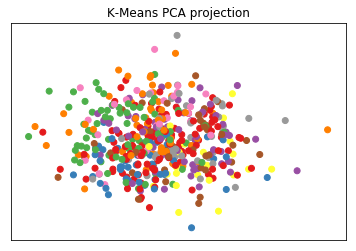

In [23]:
""" Fit into kmeans clustering method """
kmeans = KMeans(n_clusters=10).fit(data_features)
print('Shape of cluster centers:', kmeans.cluster_centers_.shape)
print('Shape of labels created by clusters:', kmeans.labels_.shape)

plot_embedding(subSpace, kmeans.labels_, 'K-Means PCA projection')
labels = mapLabels(kmeans.labels_, data_labels, 10)

In [24]:
datalist = data_sample.tolist();
print(len(datalist))

500


In [26]:
from random import randint

user_ratings = [ ( randint(1, 5), k, randint(1, 10) ) for k in range(500) ]
ur_names = ['user_id','food_id','rating']
ratings = pd.DataFrame.from_records(user_ratings,columns=ur_names)
user_profiles = [ ( k, randint(1, 2), randint(18, 22) ) for k in range(1,6) ]
up_names = ['user_id','sex','age']
users = pd.DataFrame.from_records(user_profiles,columns=up_names)
articles6 = [ ( k, resnames[k], datalist[k][0] ) for k in range(500) ]
food_names = ['food_id','food_name','food_data']
items = pd.DataFrame.from_records(articles6,columns=food_names)

In [28]:
n_users = 5
n_items = 500
data_matrix = np.zeros((n_users, n_items))
for line in ratings.itertuples():
    data_matrix[line[1]-1,line[2]-1] = line[3]

In [29]:
from sklearn.metrics.pairwise import pairwise_distances 
user_similarity = pairwise_distances(data_matrix, metric='cosine')
item_similarity = pairwise_distances(data_matrix.T, metric='cosine')

In [30]:
def predict(ratings, similarity, type='user'):
    if type == 'user':
        mean_user_rating = ratings.mean(axis=1)
        ratings_diff = (ratings - mean_user_rating[:, np.newaxis])
        pred = mean_user_rating[:, np.newaxis] + similarity.dot(ratings_diff) / np.array([np.abs(similarity).sum(axis=1)]).T
    elif type == 'item':
        pred = ratings.dot(similarity) / np.array([np.abs(similarity).sum(axis=1)])
    return pred

In [31]:
user_prediction = predict(data_matrix, user_similarity, type='user')
item_prediction = predict(data_matrix, item_similarity, type='item')

In [33]:
user_num = 2
food_num = 70
gender = 'male'
if (user_profiles[user_num - 1][1] == 1):
    gender = 'male'
else:
    gender = 'female'
print('User ' + str(user_num) + " is a " + str(user_profiles[user_num - 1][2]) + " year old " + gender + " and has a " + str(user_prediction[user_num-1][food_num] * 50) + ' percent chance of liking ' + str(resnames[food_num]) + ' according to model 1')
print('User ' + str(user_num) + " is a " + str(user_profiles[user_num - 1][2]) + " year old " + gender + " and has a " + str(item_prediction[user_num-1][food_num] * 50) + ' percent chance of liking ' + str(resnames[food_num]) + ' according to model 2')

User 2 is a 19 year old male and has a 48.324999999999996 percent chance of liking {'the-dive-skc-temple-city'} according to model 1
User 2 is a 19 year old male and has a 53.81679389312977 percent chance of liking {'the-dive-skc-temple-city'} according to model 2


In [40]:
user_num = 3
movie_bottom = 31
movie_top = 60
maxival = 0
maxindex = 0
maxival2 = 0
maxindex2 = 0

for movie_num in range (movie_bottom, movie_top+1):
    if (user_prediction[user_num-1][movie_num] > maxival and user_prediction[user_num-1][movie_num]%1 != 0):
        maxival = user_prediction[user_num-1][movie_num]
        maxindex = movie_num
        
for movie_num in range (movie_bottom, movie_top+1):
    if (item_prediction[user_num-1][movie_num] > maxival2 and item_prediction[user_num-1][movie_num]%1 != 0):
        maxival2 = user_prediction[user_num-1][movie_num]
        maxindex2 = movie_num

movieindex = maxindex
movieindex2 = maxindex2
gender = 'male'
if (user_profiles[user_num - 1][1] == 1):
    gender = 'male'
else:
    gender = 'female'
print('User ' + str(user_num) + " is a " + str(user_profiles[user_num - 1][2]) + " year old " + gender + " and has a " + str(user_prediction[user_num-1][movieindex] * 30) + ' percent chance of liking ' + str(resnames[movieindex]) + ' according to model 1')
print('User ' + str(user_num) + " is a " + str(user_profiles[user_num - 1][2]) + " year old " + gender + " and has a " + str(item_prediction[user_num-1][movieindex2] * 30) + ' percent chance of liking ' + str(resnames[movieindex2]) + ' according to model 2')

User 3 is a 22 year old female and has a 79.395 percent chance of liking {'dings-garden-arcadia'} according to model 1
User 3 is a 22 year old female and has a 44.96221662468514 percent chance of liking {'coffee-jpg-sierra-madre'} according to model 2
